In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
customer_df = pd.read_csv('./we_fn_use_c_marketing_customer_value_analysis.csv') 
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
#reemplazo mayusculas y espacios en los nombres de las columnas. 
customer_df.columns=customer_df.columns.str.upper().str.replace(' ','_')

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CUSTOMER                       9134 non-null   object 
 1   STATE                          9134 non-null   object 
 2   CUSTOMER_LIFETIME_VALUE        9134 non-null   float64
 3   RESPONSE                       9134 non-null   object 
 4   COVERAGE                       9134 non-null   object 
 5   EDUCATION                      9134 non-null   object 
 6   EFFECTIVE_TO_DATE              9134 non-null   object 
 7   EMPLOYMENTSTATUS               9134 non-null   object 
 8   GENDER                         9134 non-null   object 
 9   INCOME                         9134 non-null   int64  
 10  LOCATION_CODE                  9134 non-null   object 
 11  MARITAL_STATUS                 9134 non-null   object 
 12  MONTHLY_PREMIUM_AUTO           9134 non-null   i

In [8]:
# cambio la columna date a formato datetime 
customer_df['EFFECTIVE_TO_DATE'] = pd.to_datetime(customer_df['EFFECTIVE_TO_DATE'])

In [9]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUSTOMER                       9134 non-null   object        
 1   STATE                          9134 non-null   object        
 2   CUSTOMER_LIFETIME_VALUE        9134 non-null   float64       
 3   RESPONSE                       9134 non-null   object        
 4   COVERAGE                       9134 non-null   object        
 5   EDUCATION                      9134 non-null   object        
 6   EFFECTIVE_TO_DATE              9134 non-null   datetime64[ns]
 7   EMPLOYMENTSTATUS               9134 non-null   object        
 8   GENDER                         9134 non-null   object        
 9   INCOME                         9134 non-null   int64         
 10  LOCATION_CODE                  9134 non-null   object        
 11  MARITAL_STATUS   

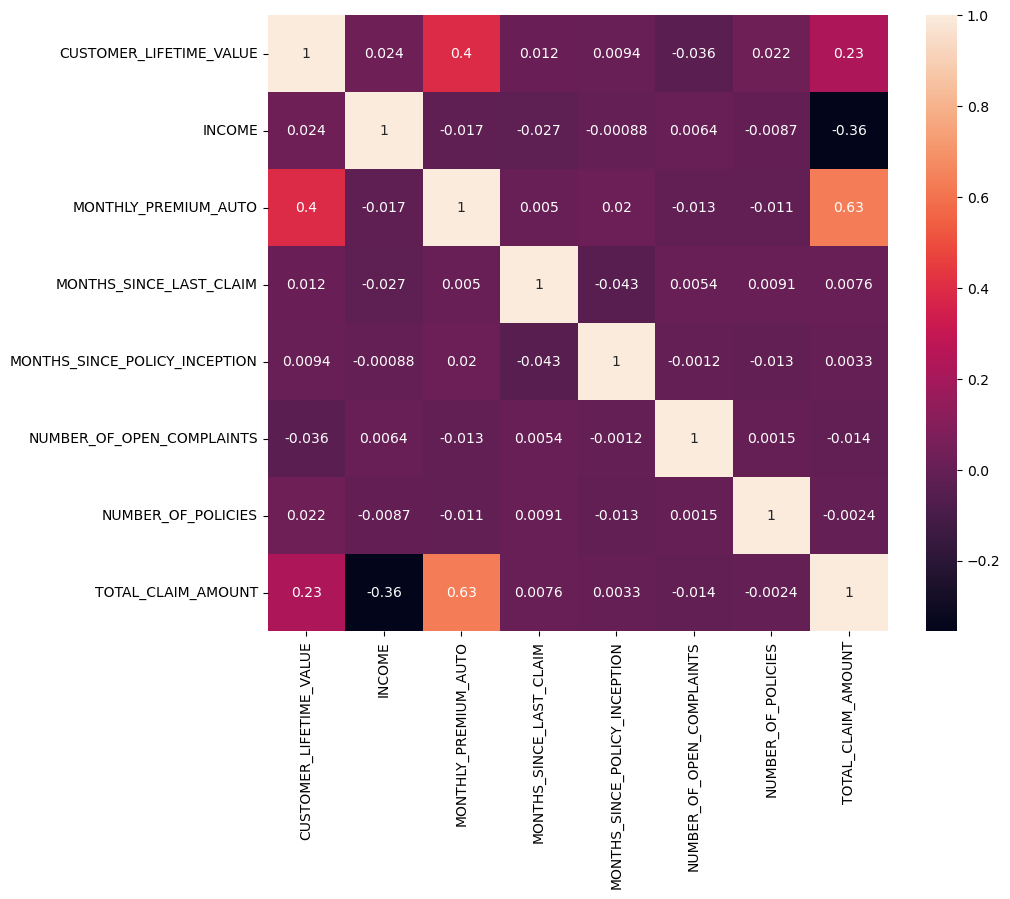

In [10]:
# Grafico matriz de correlación. 
corr_matrix=customer_df.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

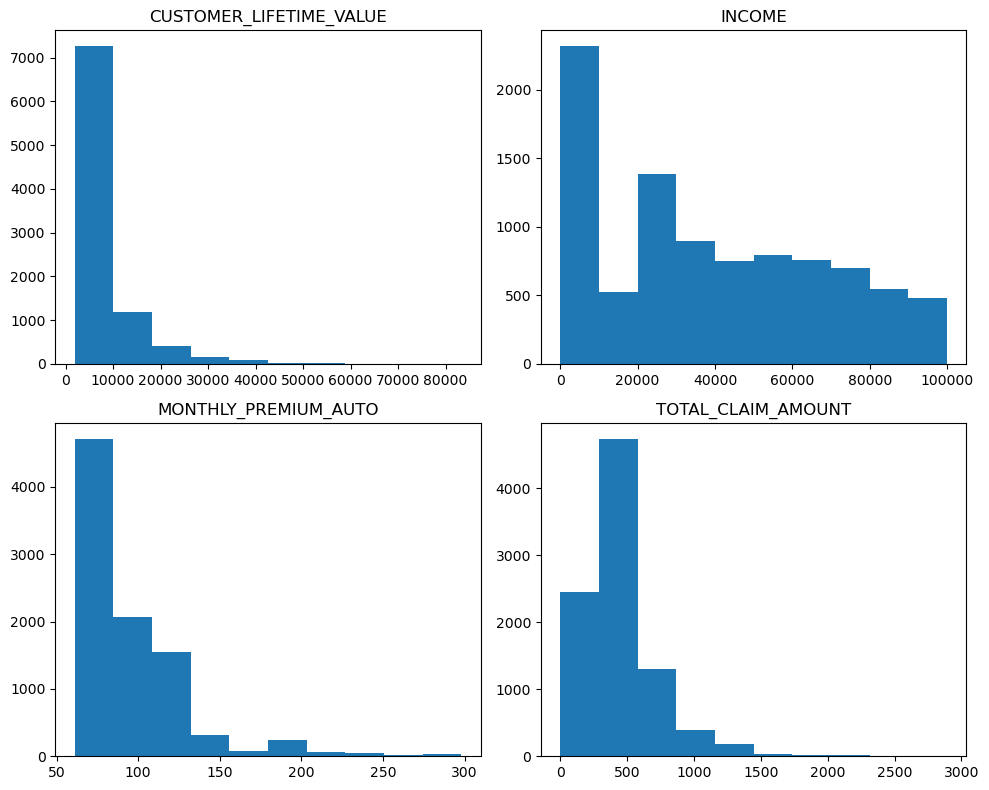

In [11]:
# Grafico las variables continuas 
import matplotlib.pyplot as plt

# Crear la figura y los subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Variable 1 - subplot 1
axes[0, 0].hist(customer_df['CUSTOMER_LIFETIME_VALUE'])
axes[0, 0].set_title('CUSTOMER_LIFETIME_VALUE')

# Variable 2 - subplot 2
axes[0, 1].hist(customer_df['INCOME'])
axes[0, 1].set_title('INCOME')

# Variable 3 - subplot 3
axes[1, 0].hist(customer_df['MONTHLY_PREMIUM_AUTO'])
axes[1, 0].set_title('MONTHLY_PREMIUM_AUTO')

# Variable 4 - subplot 4
axes[1, 1].hist(customer_df['TOTAL_CLAIM_AMOUNT'])
axes[1, 1].set_title('TOTAL_CLAIM_AMOUNT')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [16]:
#segun las graficas, se ùede observar que los datos no siguen una distribución normal y que por ejemplo en income hay muchos valores agrupados en el 0. 
customer_df.INCOME.value_counts()

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: INCOME, Length: 5694, dtype: int64

In [26]:
#separo mis variables categoricas y dropeo el customer ID
df_categ= customer_df.select_dtypes(object)
df_categ

,CUSTOMER,STATE,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [27]:
df_categ= df_categ.drop('CUSTOMER', axis=1)
df_categ

,STATE,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


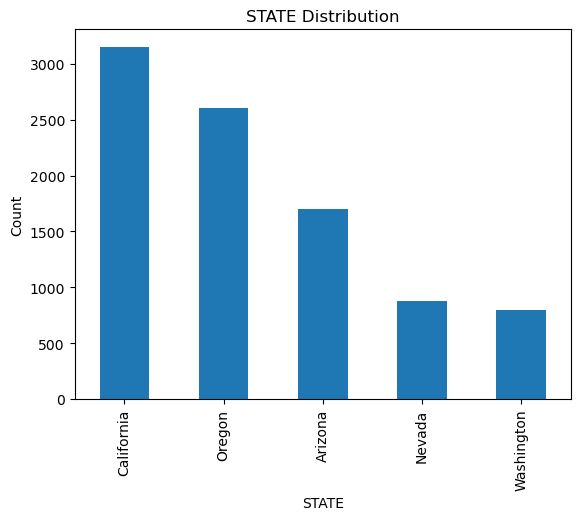

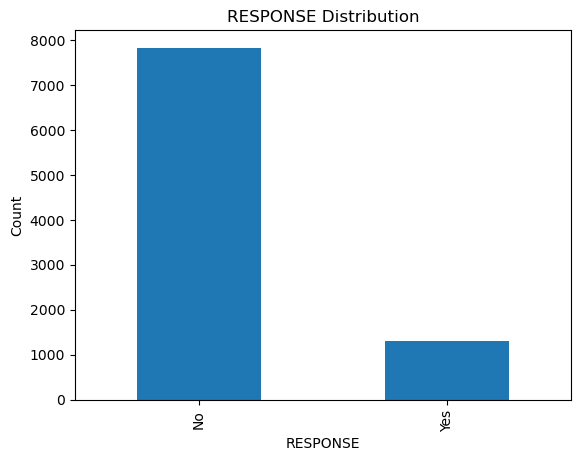

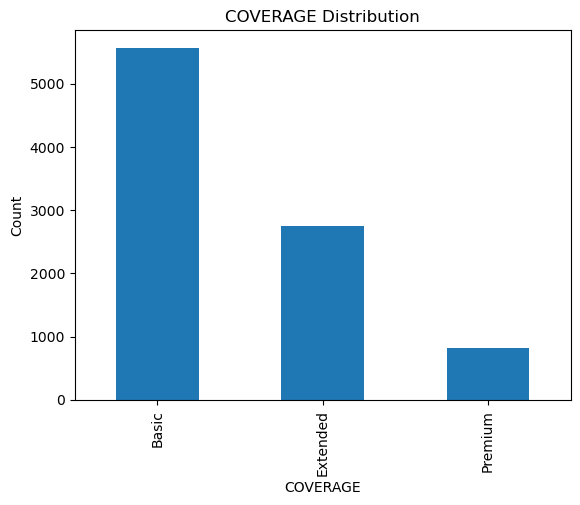

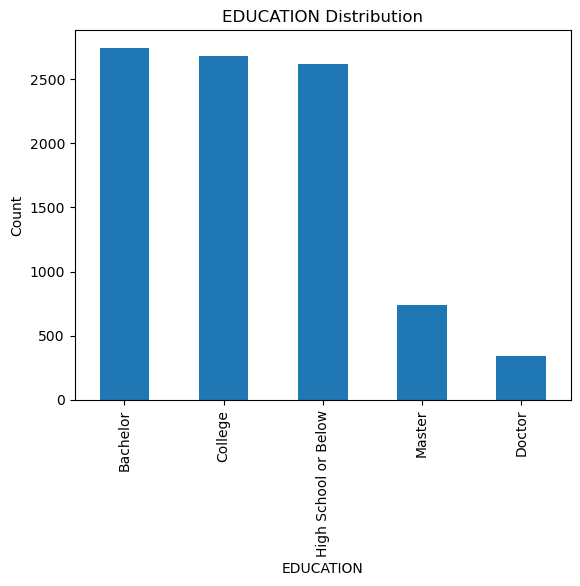

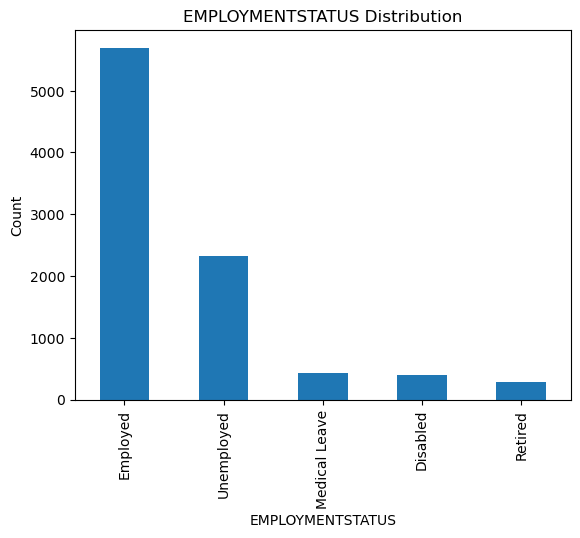

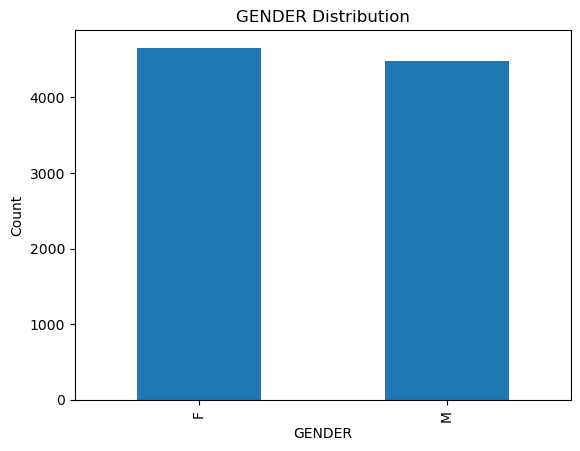

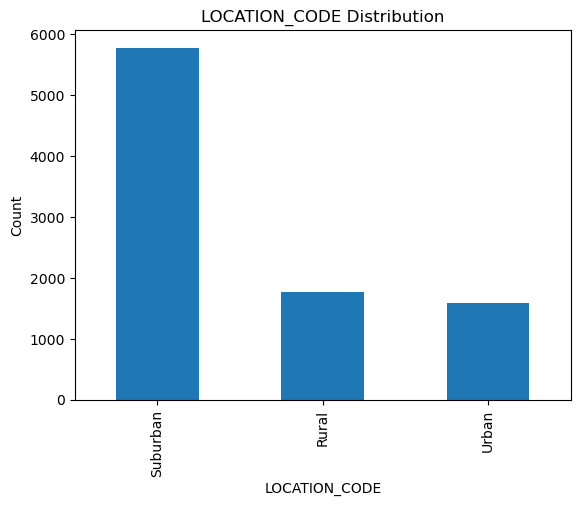

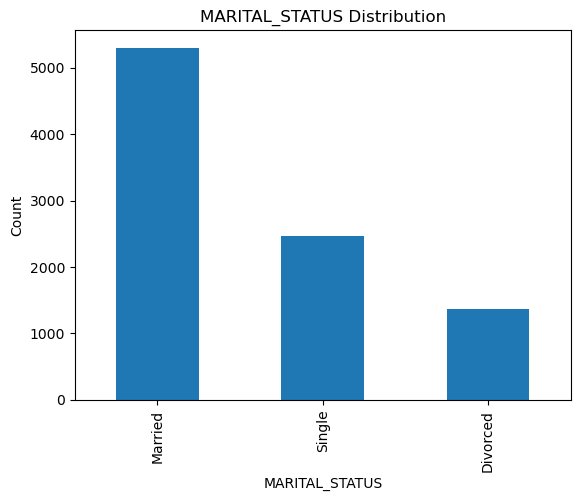

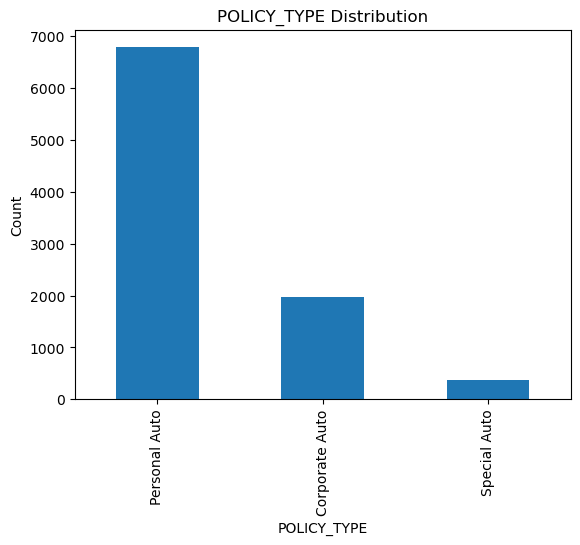

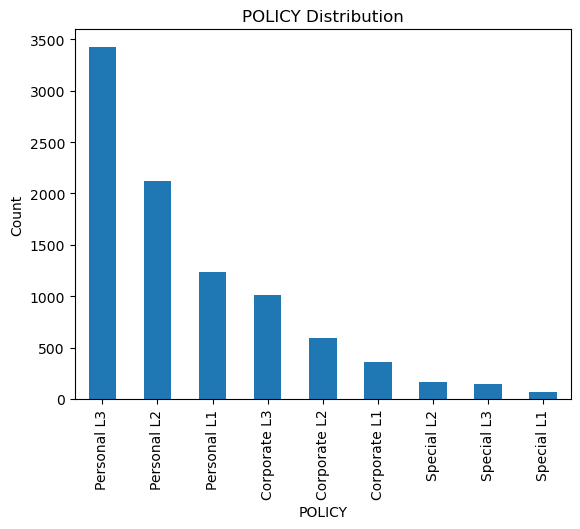

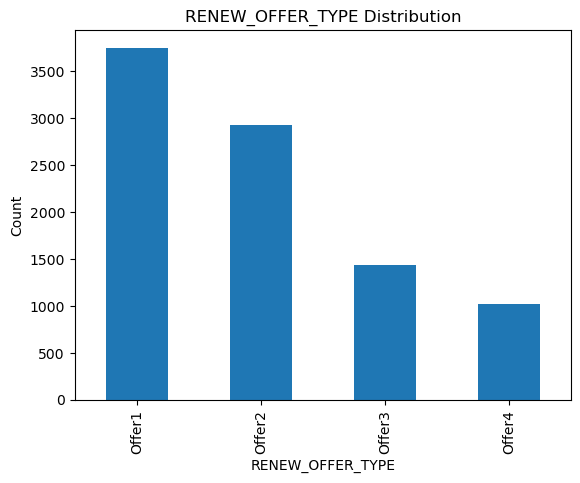

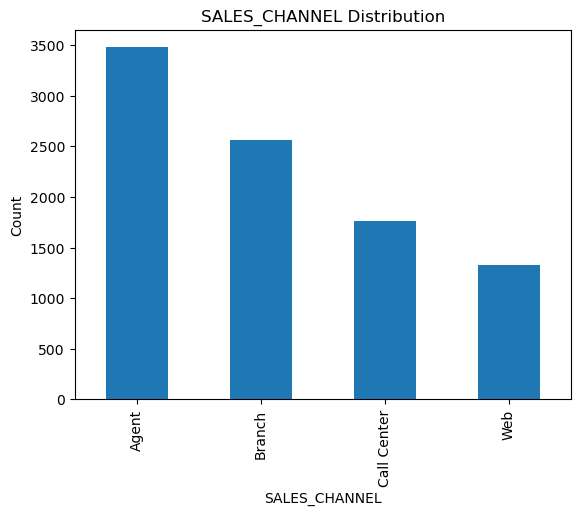

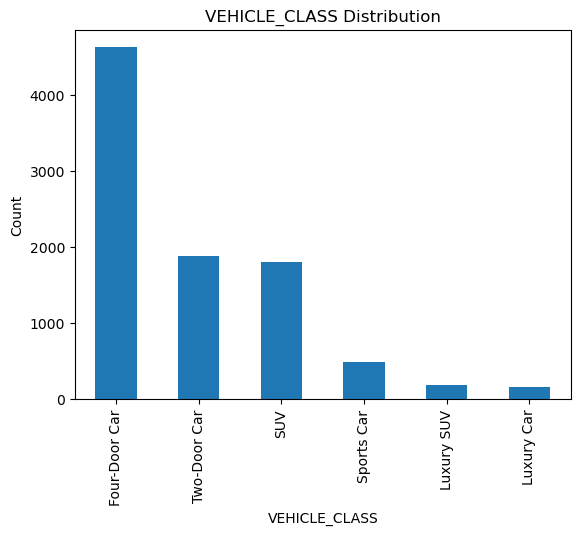

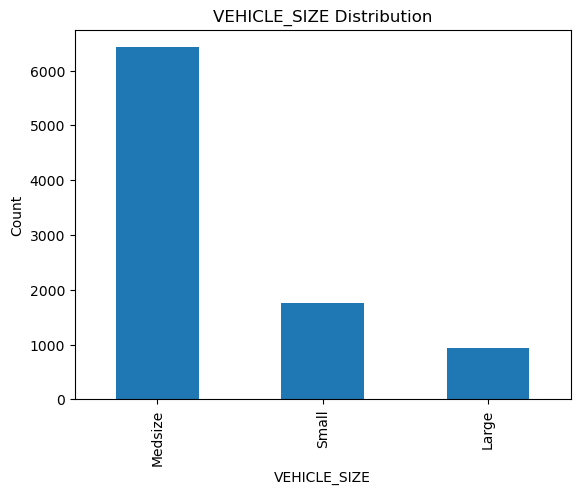

In [28]:
import matplotlib.pyplot as plt

# Bucle para generar los gráficos de barra
for column in df_categ.columns:
    plt.figure()
    df_categ[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column} Distribution')
    plt.show()

In [32]:
# grafico boxplots para ver la distribución de los outliers
#defino un DF con las variables continuas.
df_cont_variable = customer_df.loc[:, ["TOTAL_CLAIM_AMOUNT", "MONTHLY_PREMIUM_AUTO", "INCOME", "CUSTOMER_LIFETIME_VALUE"]]


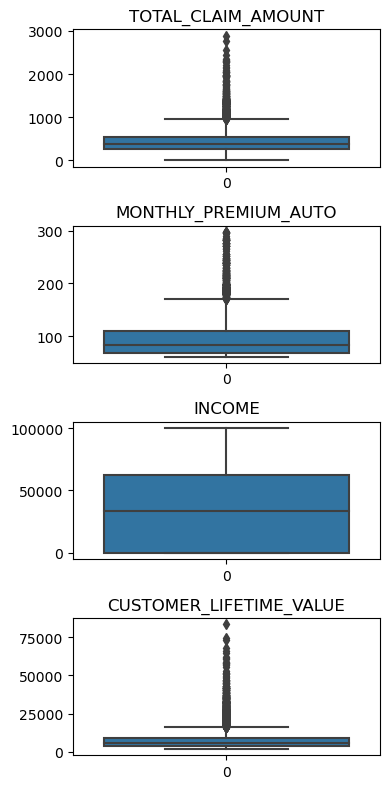

In [33]:
fig, axes = plt.subplots(len(df_cont_variable.columns), 1, figsize=(4, 2* len(df_cont_variable.columns)))

for i, column in enumerate(df_cont_variable.columns):
    sns.boxplot(df_cont_variable[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()     

 Se observa que hay muchos outliers, que podrian ser eliminados o reducidos. En la columna CUSTOMER_LIFETIME_VALUE hay nuchos outliers, pero no seria recomendable eliminarlos ya que el objetivo 

In [34]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUSTOMER                       9134 non-null   object        
 1   STATE                          9134 non-null   object        
 2   CUSTOMER_LIFETIME_VALUE        9134 non-null   float64       
 3   RESPONSE                       9134 non-null   object        
 4   COVERAGE                       9134 non-null   object        
 5   EDUCATION                      9134 non-null   object        
 6   EFFECTIVE_TO_DATE              9134 non-null   datetime64[ns]
 7   EMPLOYMENTSTATUS               9134 non-null   object        
 8   GENDER                         9134 non-null   object        
 9   INCOME                         9134 non-null   int64         
 10  LOCATION_CODE                  9134 non-null   object        
 11  MARITAL_STATUS   

In [36]:
nan_counts = customer_df.isna().sum()
nan_counts

CUSTOMER                         0
STATE                            0
CUSTOMER_LIFETIME_VALUE          0
RESPONSE                         0
COVERAGE                         0
EDUCATION                        0
EFFECTIVE_TO_DATE                0
EMPLOYMENTSTATUS                 0
GENDER                           0
INCOME                           0
LOCATION_CODE                    0
MARITAL_STATUS                   0
MONTHLY_PREMIUM_AUTO             0
MONTHS_SINCE_LAST_CLAIM          0
MONTHS_SINCE_POLICY_INCEPTION    0
NUMBER_OF_OPEN_COMPLAINTS        0
NUMBER_OF_POLICIES               0
POLICY_TYPE                      0
POLICY                           0
RENEW_OFFER_TYPE                 0
SALES_CHANNEL                    0
TOTAL_CLAIM_AMOUNT               0
VEHICLE_CLASS                    0
VEHICLE_SIZE                     0
dtype: int64

En este caso, no hay Nan Values para eliminar. En caso de detectar estos valores nulos, se pueden tratar de diferentes formas, cumplimentando con la Media en caso de variables numericas, realizando Modelos para encontrar los valores mas cercanos y parecidos. generando una nueva categoria "desconocida" en caso de las variables categoricas, tambien se pueden eliminar estos Nan Values. 